In [34]:
!pip install torch

In [36]:

import os
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [38]:

def getdata(path):
  data = torch.tensor([])
  file_list = os.listdir(path)
  for file_name in file_list[:350]:
    image_path = os.path.join(path, file_name)
    image = mpimg.imread(image_path)
    imageData = torch.from_numpy(np.array(image)).long()
    data = torch.cat((data, imageData.unsqueeze(0)), dim=0)
  return data

#
pizza_path = './pizza_vs_not/pizza'
not_pizza_path = './pizza_vs_not/not_pizza'
#

not_pizza_data = getdata(not_pizza_path)
pizza_data = getdata(pizza_path)


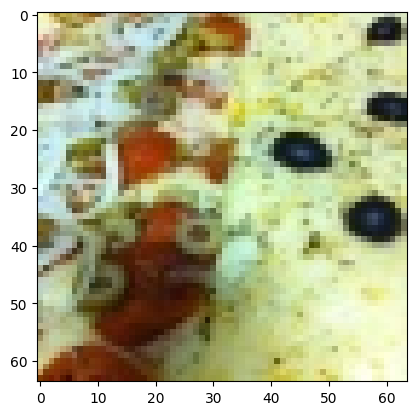

In [40]:

# Change values of index, data
#
index = 22 # 0 to 349
data =pizza_data # pizza_data (or) not_pizza_data
#

plt.imshow(data[index].int())

In [42]:

train_data = torch.cat((pizza_data[:300], not_pizza_data[:200]), dim = 0)
test_data = torch.cat((pizza_data[300:350], not_pizza_data[200:250]), dim = 0)
print(train_data.shape)


torch.Size([500, 64, 64, 3])


In [44]:

#

reshaped_test_data = torch.tensor([])
reshaped_train_data = torch.tensor([])
iteration=0
for data in train_data:
    iteration+=1
    DATA = torch.tensor(data.flatten())
    reshaped_tensor_1d = DATA.unsqueeze(0)
    if iteration==1:
      reshaped_train_data=DATA
    elif iteration==2:
      reshaped_train_data = torch.stack((reshaped_train_data,DATA), dim=0)
    else:
      reshaped_train_data = torch.cat((reshaped_train_data,reshaped_tensor_1d), dim=0)



iteration=0
for data in test_data:
    iteration+=1
    DATA = torch.tensor(data.flatten())
    reshaped_tensor_1d = DATA.unsqueeze(0)
    if iteration==1:
      reshaped_test_data=DATA
    elif iteration==2:
      reshaped_test_data = torch.stack((reshaped_test_data,DATA), dim=0)
    else:
      reshaped_test_data = torch.cat((reshaped_test_data,reshaped_tensor_1d), dim=0)


final_train_data =torch.mul(reshaped_train_data,1/255)
final_test_data =torch.mul(reshaped_test_data,1/255)

#

print(final_train_data.shape, final_test_data.shape)



/tmp/ipykernel_54655/3162632109.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  DATA = torch.tensor(data.flatten())


torch.Size([500, 12288]) torch.Size([100, 12288])


/tmp/ipykernel_54655/3162632109.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  DATA = torch.tensor(data.flatten())


In [46]:

#

train_labels =torch.cat((torch.ones(300),torch.zeros(200)),dim=0)

test_labels =torch.cat((torch.ones(50),torch.zeros(50)),dim=0)
train_labels = train_labels.unsqueeze(1)
test_labels = test_labels.unsqueeze(1)
#

print(train_labels.shape, test_labels.shape)

torch.Size([500, 1]) torch.Size([100, 1])


In [48]:

#

D_in =12288
H1 =10
H2 =12
D_out =1

#

In [50]:


model = torch.nn.Sequential(
    # Do not hard-code any values, use the variables from the previous cell
    #

    #
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, D_out),
    torch.nn.Sigmoid(),

)

In [52]:
final_train_data.shape

torch.Size([500, 12288])

In [54]:

loss_fn = nn.BCELoss()

#

learning_rate = 0.005
iterations = 10000

for t in range(iterations):

    # call the model on the dataset
    y_pred =model(final_train_data)
    #calculate the loss
    loss = loss_fn(y_pred, train_labels)

    if t%1000 == 1:
      print(loss)


    #calculate the gradients (dont forget to reset the gradients before you begin)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    # Backward pass
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    with torch.no_grad():
      optimizer.step()  # Update parameters
#

torch.save(model, 'model_best.pt')

tensor(0.6793, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.2450, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0625, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0203, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0091, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0052, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0035, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0025, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0020, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0016, grad_fn=<BinaryCrossEntropyBackward0>)


According to the neural network, index = 6 is a pizza


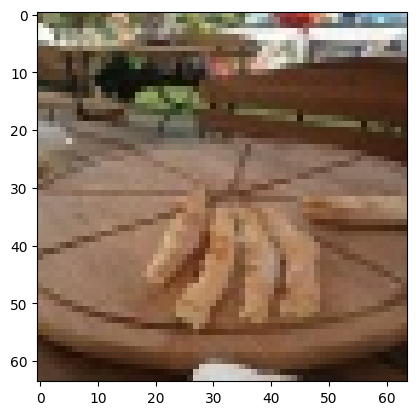

In [56]:

# Change values of index
#
index = 6 #0 to 99
#

plt.imshow(test_data[index].int())
print (f'According to the neural network, index = {index} is {"a pizza" if model(final_test_data[index]) > 0.5 else "not a pizza"}')

In [58]:
def predict(model, data, labels):

    probabilities = model(data)

    #

    # generate the predictions tensor using the probabilities variable, which indicates the prediction made by the model for the given data using 0 and 1

    predictions = torch.round(probabilities)

    #

    print("Accuracy: "  + str(torch.sum((predictions == labels)).item()/predictions.shape[0]))


In [60]:

predict(model, final_train_data, train_labels)
predict(model,final_test_data,test_labels)
print("Done!")


Accuracy: 1.0
Accuracy: 0.84
Done!
